<a href="https://colab.research.google.com/github/Oba-max22/learner/blob/master/Household_Data_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# # load all data
# dataset = pd.read_csv('household_power_consumption.txt', sep=';',
#                    header=0, low_memory=False, infer_datetime_format=True, 
#                    parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# # summarize
# print(dataset.shape)
# dataset.head()

In [4]:
# dataset.isnull().values.any()

In [5]:
# from numpy import nan
# from pandas import read_csv

# # mark all missing values
# dataset.replace('?', nan, inplace=True)
# # add a column for for the remainder of sub metering
# values = dataset.values.astype('float32')
# dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# # save updated dataset
# dataset.to_csv('household_power_consumption.csv')
# # load the new dataset and summarize
# dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# print(dataset.head())

In [6]:
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'])
dataset.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [7]:
dataset.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
sub_metering_4           25979
dtype: int64

In [9]:
dataset = dataset.resample('D', on='datetime').sum()
dataset.head()

Global_active_power        1564.905216
Global_reactive_power       177.427937
Voltage                  345118.591774
Global_intensity           6634.399772
Sub_metering_1             1609.463521
dtype: float64

In [9]:
dataset_copy = dataset.copy()
df_bfill = dataset_copy.fillna(method='bfill')
df_bfill.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64

In [ ]:
df_bfill.fillna(value=0, inplace=True)

In [11]:
df_bfill.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64

In [12]:
df_bfill.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'sub_metering_4'],
      dtype='object')

Text(0, 0.5, 'Global_active_power')

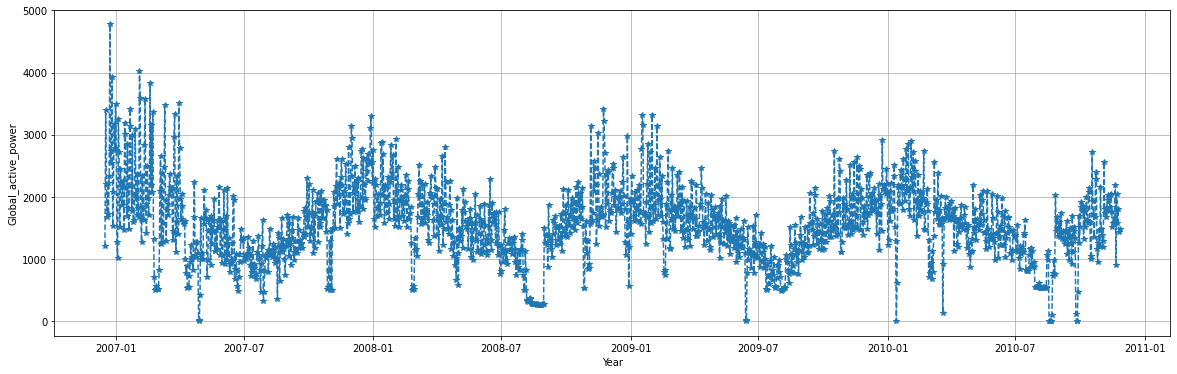

In [13]:
plt.figure(figsize=(20,6))
plt.plot(df_bfill.index, df_bfill.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')

In [22]:
df_bfill.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.128508,0.270671,0.999222,0.549166,0.485152,0.751204,0.893351
Global_reactive_power,0.128508,1.000000,0.348427,0.150197,0.331805,0.199807,0.123274,-0.014339
Voltage,0.270671,0.348427,1.000000,0.274403,0.094364,0.080908,0.276219,0.228207
Global_intensity,0.999222,0.150197,0.274403,1.000000,0.560965,0.493896,0.743731,0.890666
Sub_metering_1,0.549166,0.331805,0.094364,0.560965,1.000000,0.257728,0.322270,0.370209
Sub_metering_2,0.485152,0.199807,0.080908,0.493896,0.257728,1.000000,0.213210,0.270872
Sub_metering_3,0.751204,0.123274,0.276219,0.743731,0.322270,0.213210,1.000000,0.479622
sub_metering_4,0.893351,-0.014339,0.228207,0.890666,0.370209,0.270872,0.479622,1.000000


In [14]:
pearson_corr = df_bfill['Global_active_power'].corr(df_bfill['Global_reactive_power'])
print(pearson_corr)
round(pearson_corr, 2)

0.12850750449622442


0.13

In [15]:
pearson_corr2 = df_bfill['Voltage'].corr(df_bfill['Global_intensity'])
print(pearson_corr2)
round(pearson_corr2, 2)

0.2744029180380319


0.27

In [20]:
min(df_bfill['Global_active_power'])

0.0